In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from Database import db_mongo

import string

In [2]:
db = db_mongo.db_mongo()

db.insert_text({"text":"Text content"})

df = db.get_text(100000000)

#print(items_df)

all_text = list()

for item in df["text"]:
    # This does not give a very readable output
    text = item.encode('utf8')
    #print(item)
    #all_text.append(item)
    
    nopunc = [word.replace('\n'," ").replace('\x0c'," ") for word in item if word not in string.punctuation]
       
    
        
    nopunc = ''.join(nopunc)
    all_text.append(nopunc.lower())
    


Init DB


In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(all_text)

In [4]:
cls = MiniBatchKMeans(n_clusters=8,max_iter=10000, random_state=0)
cls.fit(features)

MiniBatchKMeans(max_iter=10000, random_state=0)

In [5]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([6, 6, 2, ..., 2, 2, 2], dtype=int32)

In [6]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

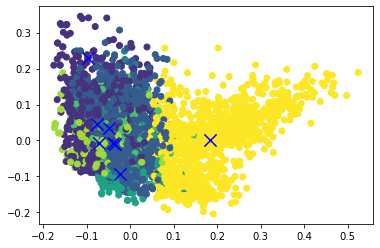

In [7]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

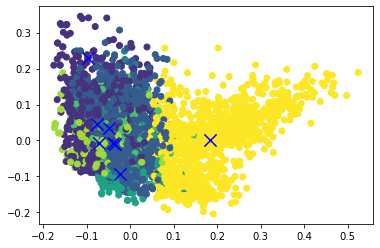

In [8]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.labels_)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [9]:
from sklearn.metrics import homogeneity_score
homogeneity_score(all_text, cls.predict(features))

0.1754748691270201

In [10]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.0003600534397967019

KMeans

In [11]:
from sklearn.cluster import KMeans

number_of_clusters = 8

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model = KMeans(n_clusters=number_of_clusters, 
               init='k-means++', 
               max_iter=10000, # Maximum number of iterations of the k-means algorithm for a single run.
               n_init=10)  # Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.

model.fit(features)

KMeans(max_iter=10000)

In [12]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([6, 6, 2, ..., 2, 2, 2], dtype=int32)

In [13]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=0)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

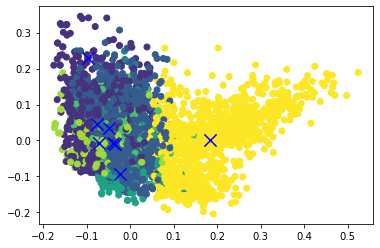

In [14]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

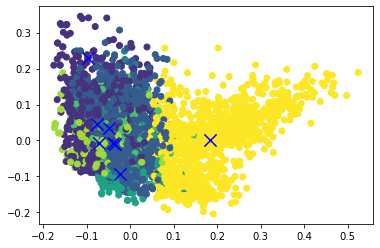

In [15]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.labels_)
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [16]:
from sklearn.metrics import homogeneity_score
homogeneity_score(all_text, cls.predict(features))

0.1754748691270201

In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.0003600534397967019